In [1]:
import numpy as np
import pandas as pd

In [2]:
path = "D:\\github\\AML_HW1\\data\\"

In [27]:
eng_train = pd.read_csv(path + "train_eng.csv")
eng_test = pd.read_csv(path + "test_eng.csv")

In [11]:
eng_train.head()

,Name,Gender
0,Terrone,M
1,Annaley,F
2,Alajha,F
3,Efrem,M
4,Damus,M


In [9]:
unique = list(set("".join(eng_train["Name"])))
unique.sort()
vocab = dict(zip(unique, range(1,len(unique)+1)))

In [15]:
MAX_LEN = 15
def preproc(seq, voc, max_len = MAX_LEN):
    res = np.zeros(max_len)
    for i, ch in enumerate(seq):
        res[i] = voc[ch]
    return res

In [28]:
x_train = np.array([preproc(seq, vocab) for seq in eng_train["Name"]], dtype = np.int8)
x_test = np.array([preproc(seq, vocab) for seq in eng_test["Name"]], dtype = np.int8)

In [29]:
y_train = np.array([0 if g == 'F' else 1 for g in eng_train["Gender"]], dtype = np.int8)
y_test = np.array([0 if g == 'F' else 1 for g in eng_test["Gender"]], dtype = np.int8)

In [30]:
y_train[:10]

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int8)

In [31]:
x_train[:10]

array([[20, 31, 44, 44, 41, 40, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 40, 40, 27, 38, 31, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 38, 27, 36, 34, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5, 32, 44, 31, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 27, 39, 47, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 38, 35, 39, 27, 46, 41, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 27, 51, 38, 31, 40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [10, 41, 34, 40, 45, 29, 41, 46, 46,  0,  0,  0,  0,  0,  0],
       [18, 47, 30, 41, 38, 42, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [14, 41, 44, 38, 35, 45, 34, 35, 27,  0,  0,  0,  0,  0,  0]],
      dtype=int8)

In [32]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [83]:
print(f"Testing Accuracy:  {score:.4f}")

Testing Accuracy:  0.6287


In [48]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Model#1

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

embedding_dim = 15

model = Sequential()
model.add(layers.Embedding(input_dim=len(vocab) + 1, 
                           output_dim=embedding_dim, 
                           input_length=MAX_LEN))
model.add(layers.Flatten())
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 15, 15)            795       
_________________________________________________________________
flatten_7 (Flatten)          (None, 225)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 15)                3390      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 16        
Total params: 4,201
Trainable params: 4,201
Non-trainable params: 0
_________________________________________________________________


In [109]:
history = model.fit(x_train, y_train,
                    epochs=35,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    batch_size=128)

Training Accuracy:  0.8073
Testing Accuracy:  0.8040


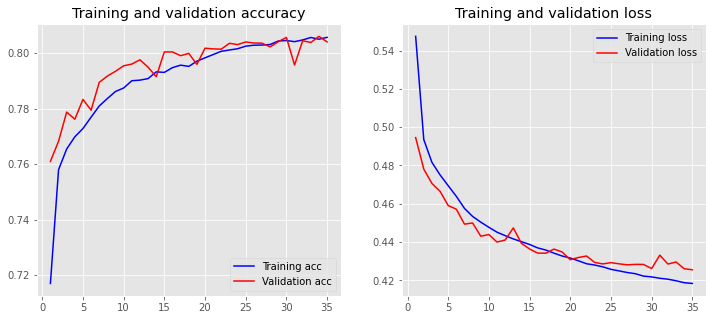

In [110]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print(f"Training Accuracy:  {accuracy:.4f}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f"Testing Accuracy:  {accuracy:.4f}")
plot_history(history)

Model#2 

In [111]:
model = Sequential()
model.add(layers.Embedding(input_dim=len(vocab) + 1, 
                           output_dim=embedding_dim, 
                           input_length=MAX_LEN))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 15, 15)            795       
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 15)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 16        
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


In [112]:
history = model.fit(x_train, y_train,
                    epochs=35,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    batch_size=128)

Training Accuracy:  0.7085
Testing Accuracy:  0.7055


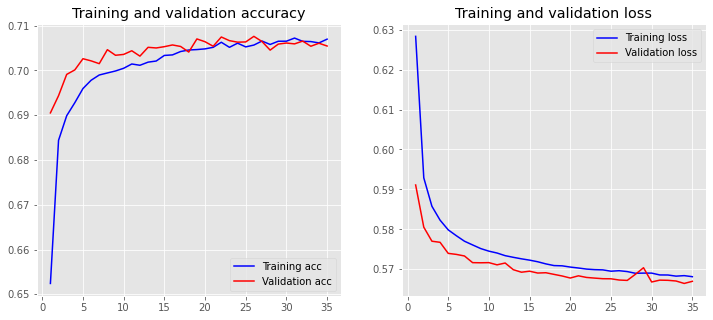

In [113]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print(f"Training Accuracy:  {accuracy:.4f}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f"Testing Accuracy:  {accuracy:.4f}")
plot_history(history)

RNN model

In [114]:
model = Sequential()
model.add(layers.Embedding(input_dim=len(vocab) + 1, 
                           output_dim=embedding_dim, 
                           input_length=MAX_LEN))
model.add(layers.GRU(15))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 15, 15)            795       
_________________________________________________________________
gru_7 (GRU)                  (None, 15)                1440      
_________________________________________________________________
dense_47 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 16        
Total params: 2,491
Trainable params: 2,491
Non-trainable params: 0
_________________________________________________________________


In [115]:
history = model.fit(x_train, y_train,
                    epochs=35,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    batch_size=128)

Training Accuracy:  0.8199
Testing Accuracy:  0.8159


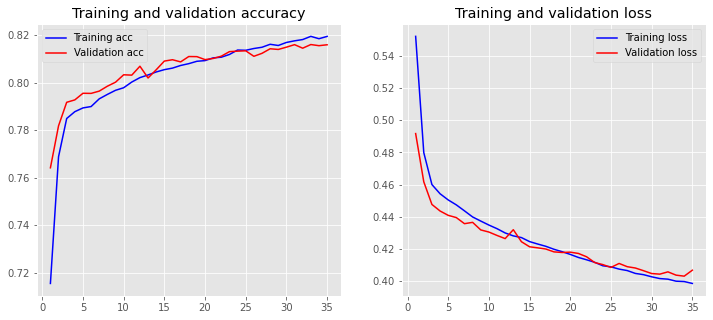

In [116]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print(f"Training Accuracy:  {accuracy:.4f}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f"Testing Accuracy:  {accuracy:.4f}")
plot_history(history)